In [3]:
# Standard imports
import os
import sys

# Setting up enviornment for neurite
sys.path.append('../../../')
os.environ['NEURITE_BACKEND'] = 'pytorch'

import torch
# OPTIONAL: Importing matplotlib for visualization purposes
import matplotlib.pyplot as plt

# Importing samplers from neurite
from neurite.torch.layers import Resample
from neurite.torch.random import RandInt

# 1 Resampling a tensor

## 1.1 Initialize an image

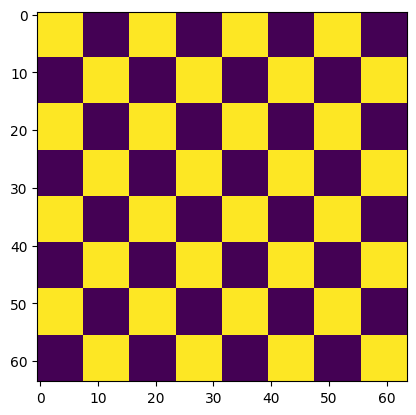

In [32]:
# Define dimensions
spatial_dims = 64
square_dims = 8

input_tensor = torch.zeros((1, 1, spatial_dims, spatial_dims))

# Fill in 3x3 white squares
for i in range(0, spatial_dims, square_dims):
    for j in range(0, spatial_dims, square_dims):
        # Determine whether to make this square white or black
        if (i // square_dims + j // square_dims) % 2 == 0:
            input_tensor[0, 0, i:i + square_dims, j:j + square_dims] = 1

plt.imshow(input_tensor[0, 0].numpy())

## 1.2 Resample the image

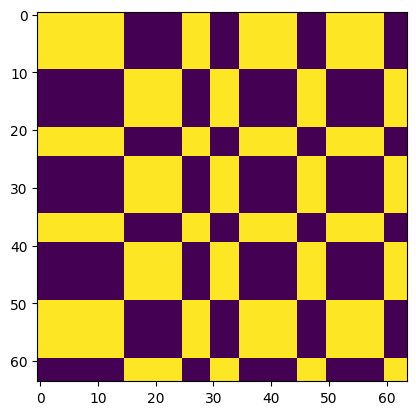

In [34]:
# Initialize the transformation
transform = Resample(
    # subsample -> upsample (x4)
    operations='susususu',
    stride=RandInt(3, 6)
)

# Transform the image
transformed_tensor = transform(input_tensor)

# Let's see what it looks like
plt.imshow(transformed_tensor[0, 0])

## 1.3 Inspect the state dict

In [35]:
state_dict = transform.serialize()
state_dict

{'qualname': 'Resample',
 'parent': 'BaseTransform',
 'module': 'neurite.torch.layers',
 'arguments': {'operations': 'susususu',
  'stride': {'qualname': 'RandInt',
   'parent': 'Sampler',
   'module': 'neurite.torch.random',
   'theta': {'low': 3, 'high': 6}},
  'forbidden_dims': (1, 0),
  'p': 0.5,
  'max_concurrent_subsamplings': None,
  'mode': 'nearest'}}

## 1.4 Accessing certain input parameters

In [36]:
# Let's see what we used for stride!
state_dict['arguments']['stride']

{'qualname': 'RandInt',
 'parent': 'Sampler',
 'module': 'neurite.torch.random',
 'theta': {'low': 3, 'high': 6}}

# 2 Softly quantizing

## 2.1 Initialize an image

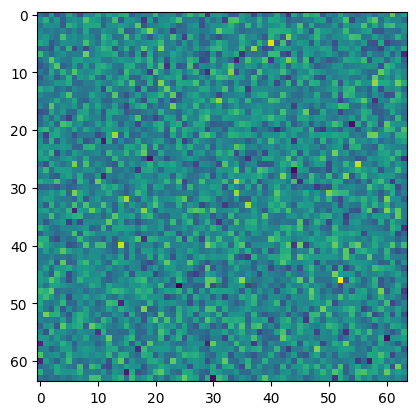

In [37]:
input_tensor = torch.randn(1, 1, 64, 64)
plt.imshow(input_tensor[0, 0].numpy())

## 2.2 Perform the soft quantization transformation

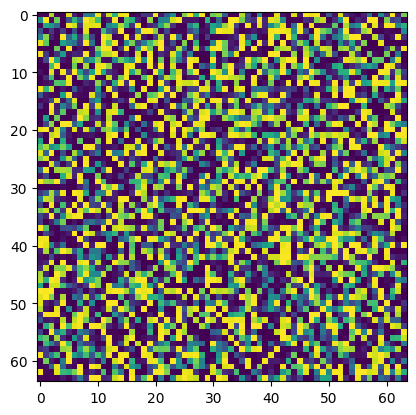

In [42]:
from neurite.torch.layers import SoftQuantize
from neurite.torch.random import Uniform

transform = SoftQuantize(
    nb_bins=RandInt(2, 4),
    softness=Uniform(0.25, 0.5),
)
transformed_tensor = transform(input_tensor)

# Let's see what it looks like
plt.imshow(transformed_tensor[0, 0])

## 2.3 Inspect the state dict

In [43]:
state_dict = transform.serialize()
state_dict

{'qualname': 'SoftQuantize',
 'parent': 'BaseTransform',
 'module': 'neurite.torch.layers',
 'arguments': {'nb_bins': {'qualname': 'RandInt',
   'parent': 'Sampler',
   'module': 'neurite.torch.random',
   'theta': {'low': 2, 'high': 4}},
  'softness': {'qualname': 'Uniform',
   'parent': 'Sampler',
   'module': 'neurite.torch.random',
   'theta': {'min_val': 0.25, 'max_val': 0.5}},
  'min_clip': -inf,
  'max_clip': inf,
  'return_log': False}}